# Group Assignment for Week6

In [22]:
import numpy as np
import matplotlib.pyplot as plt

### Problem 1

<font size = 3 color = black face = "Times New Roman">First we want to generate the matrix A, we define a function to generate it.

In [23]:
def matrix_a(N):
    A = np.zeros((N,N))
    for i in range(N):
        for j in range(N):
            if i==j:
                A[i][j] = 2
            elif i == j - 1 or i == j + 1:
                A[i][j] = -1
    return A

<font size = 3 color = black face = "Times New Roman">(a) and (b)

<font size = 3 color = black face = "Times New Roman">Using $N = 5$ as an example, we first generate a solution generated by the normal distributed random numbers. Here we use the inner function $numpy.random.normal()$

In [24]:
N = 5
A = matrix_a(N)
x_a = np.random.normal(size = (N,1))
b = np.dot(A, x_a)

<font size = 3 color = black face = "Times New Roman">Then we define a funtion to realize the Jacobi method.

In [25]:
def jacobi(A, b, x_init, epsilon = 1e-10, max_iterations = 10000):
    D = np.diag(np.diag(A))
    LU = A - D
    x = x_init
    for i in range(max_iterations):
        D_inv = np.diag(1/np.diag(D))
        x_new = np.dot(D_inv, b - np.dot(LU, x))
        if np.linalg.norm(x_new - x) < epsilon:
            break
        x = x_new
    return x_new, i

In [26]:
x_init = np.zeros_like(b)  # generate a init vector x
x, iteration = jacobi(A, b, x_init)
print(x_a)
print(x)
print("iteration count:{}".format(iteration))

[[-0.80218713]
 [ 0.70233314]
 [-0.57502224]
 [-0.11887149]
 [ 0.43471781]]
[[-0.80218713]
 [ 0.70233314]
 [-0.57502224]
 [-0.11887149]
 [ 0.43471781]]
iteration count:163


<font size = 3 color = black face = "Times New Roman">Please pay attention that the iteration count is changed with the solution x_a, as we use a inner function to generate it, so everytime we run this program, the solution x_a and iteration count are different, but the iteration count difference is not huge.

<font size = 3 color = black face = "Times New Roman">Then let's explore the relation between $N$ and iteration count.

N: [ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28
 29 30 31 32 33 34 35 36 37 38 39]
iteration count: [ 167.  225.  307.  354.  436.  580.  687.  796.  941. 1046. 1242. 1420.
 1555. 1722. 1731. 2171. 2202. 2571. 2598. 3018. 3207. 3419. 3823. 4113.
 4280. 4684. 5031. 5134. 5368. 5806. 6121. 6141. 6522. 7448. 7663.]


Text(0.5, 1.0, 'N-iteration count')

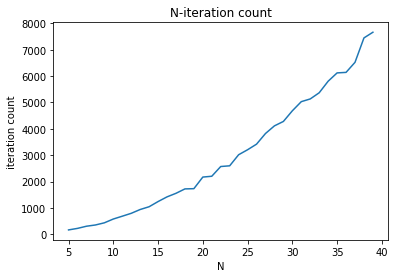

In [27]:
n_test = np.array([i for i in range(5, 40)])
iteration_test = np.zeros(len(n_test))
for n in n_test:
    A = matrix_a(n)
    x_a = np.random.normal(size = (n,1))
    b = np.dot(A, x_a)
    x_init = np.zeros_like(b)
    x, iteration = jacobi(A, b, x_init)
    iteration_test[n-5] = iteration
print("N:", n_test)
print("iteration count:",iteration_test)
plt.plot(n_test, iteration_test)
plt.xlabel('N')
plt.ylabel('iteration count')
plt.title('N-iteration count')

<font size = 3 color = black face = "Times New Roman">When $N$ is little, the line is like a linear function, but with $N$ icreasing, this image is more and more like a quadratic function.

<font size = 3 color = black face = "Times New Roman">(c)

<font size = 3 color = black face = "Times New Roman">Now we define a function to express weighted Jacobi method. Here we use $\omega$ $=$$ {2}\over{3}$.

In [28]:
def weighted_jacobi(A, b, x_init, epsilon = 1e-10, max_iterations = 10000):
    D = np.diag(np.diag(A))
    LU = A - D
    x = x_init
    for i in range(max_iterations):
        D_inv = np.diag(1/np.diag(D))
        x_new = x*(2/3) + (1/3)*np.dot(D_inv, b - np.dot(LU, x))
        if np.linalg.norm(x_new - x) < epsilon:
            break
        x = x_new
    return x_new, i 

[ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28
 29 30 31 32 33 34 35 36 37 38 39]
[ 444.  569.  747.  873. 1189. 1298. 1605. 1814. 2097. 2566. 2694. 3089.
 3438. 3914. 3977. 4493. 5005. 5635. 5445. 6353. 6799. 7450. 7940. 8636.
 8876. 9349. 8718. 9999. 9999. 8796. 9999. 9999. 9999. 9999. 9999.]


Text(0.5, 1.0, 'N-iteration')

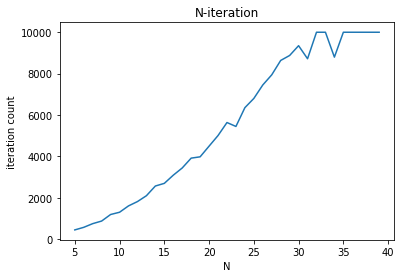

In [29]:
n_test = np.array([i for i in range(5, 40)])
print(n_test)
iteration_test = np.zeros(len(n_test))
for n in n_test:
    A = matrix_a(n)
    x_a = np.random.normal(size = (n,1))
    b = np.dot(A, x_a)
    x_init = np.zeros_like(b)
    x, iteration = weighted_jacobi(A, b, x_init)
    iteration_test[n-5] = iteration
print(iteration_test)
plt.plot(n_test, iteration_test)
plt.xlabel('N')
plt.ylabel('iteration count')
plt.title('N-iteration')

<font size = 3 color = black face = "Times New Roman">We can find that the iteration count is much bigger.

### Problem 2

#### Question a

<font size = 3 color = black face = "Times New Roman">First we want to generate the matrix A, we define a function to generate it

In [30]:
# Define the N rank second difference matrix.
def matrix_a(N):
    A = np.zeros((N,N))
    for i in range(N):
        for j in range(N):
            if i==j:
                A[i][j] = 2
            elif i == j - 1 or i == j + 1:
                A[i][j] = -1
    return A

In [31]:
# Define a function to do gauss_seidel method with epsilon is 1e-10
def gauss_seidel(A, b, x=None, max_iterations = 10000, epsilon = 1e-10):
    # Create an initial guess if needed                                                            
    if x is None:
        x = np.zeros_like(b)
  
    for it_count in range(max_iterations):
        x_new = np.zeros_like(x)
        for i in range(A.shape[0]):
            s1 = np.dot(A[i, :i], x_new[:i])
            s2 = np.dot(A[i, i + 1:], x[i + 1:])
            x_new[i] = (b[i] - s1 - s2) / A[i, i]
        if np.allclose(x, x_new, rtol=epsilon):
            break
        x = x_new
    return x, it_count

In [32]:
N = 5
A = matrix_a(N)
x_a = np.random.normal(size = (N,1))
b = np.dot(A, x_a)
x_init = np.zeros_like(b)
x, iteration = gauss_seidel(A, b, x_init)
print('True solution is\n',x_a)
print('Solution by using gauss_seidel method is\n',x)
print('The iteration is', iteration)

True solution is
 [[-0.45045935]
 [-1.14857298]
 [ 0.3370232 ]
 [ 0.67559208]
 [ 0.49887911]]
Solution by using gauss_seidel method is
 [[-0.45045937]
 [-1.14857301]
 [ 0.33702316]
 [ 0.67559206]
 [ 0.4988791 ]]
The iteration is 57


Text(0.5, 1.0, 'N-iteration')

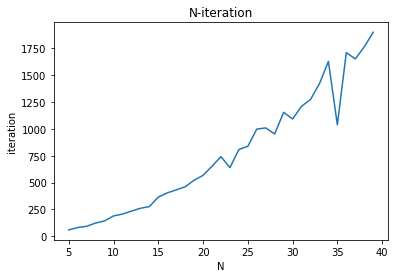

In [33]:
#Get n for test
n_test = np.array([i for i in range(5, 40)])
#Get iteration for the test n
iteration_test = np.zeros_like(n_test)
for n in n_test:
    A = matrix_a(n)
    x_a = np.random.normal(size = (n,1))
    b = np.dot(A, x_a)
    x_init = np.zeros_like(b)
    x, iteration = gauss_seidel(A, b, x_init)
    iteration_test[n-5] = iteration
plt.plot(n_test, iteration_test)
plt.xlabel('N')
plt.ylabel('iteration')
plt.title('N-iteration')

<font size = 3 color = black face = "Times New Roman"> Form the figure we are easy to know that when N is larger, the iteration is larger.

#### Question b

<font size = 3 color = black face = "Times New Roman">Obviously, Gauss-Seidel method converge, as expected, faster than the Jacobi method

### Problem 3

#### a) 
<font size = 3 color = black face = "Times New Roman"> In this problem, we're required to solve the following linear system with the SOR method.
$$
\begin{cases}
3x_1 - x_2+ x_3 = -1\\
-x_1 +3x_2 -x_3 = 7\\
x_1 - x_2 +3x_3 = -7\\
\end{cases}
$$

<font size = 3 color = black face = "Times New Roman"> First of all, let's rewrite the linear system in the matrix form and input related matrices. define 
$
A = \begin{pmatrix} 
3 & -1 & 1\\
-1 & 3 & -1\\
1 & -1 & 3\\
\end{pmatrix}
$, $
b = \begin{pmatrix} 
-1\\
7\\
-7\\
\end{pmatrix}
$
, then the system can be written as
$$
Ax = 
\begin{pmatrix} 
3 & -1 & 1\\
-1 & 3 & -1\\
1 & -1 & 3\\
\end{pmatrix}
\begin{pmatrix} 
x_1\\
x_2\\
x_3\\
\end{pmatrix}
= 
\begin{pmatrix} 
-1\\
7\\
-7\\
\end{pmatrix}
= b
$$

In [34]:
import numpy as np # Input matrices A and b
A = np.array([[3, -1, 1],
              [-1, 3, -1],
              [1, -1, 3]])
b = np.array([[-1], [7], [-7]])

<font size = 3 color = black face = "Times New Roman"> After that, we define a function to use the SOR method to solve linear systems.

In [35]:
eps = 1e-10 # Set the accuracy (epsilon).

In [36]:
from numpy import array, zeros, zeros_like, dot, allclose
def SOR(A, b, omega, N=25, x=None):
# omega is the relaxation parameter,N is the maximum iteration number, x is the initial guess, eps is the accuracy.
    if x is None:
        x = zeros_like(b)
    for it_count in range(N): 
        x_new = zeros_like(x)
        for i in range(A.shape[0]):
            s1 = dot(A[i, :i], x_new[:i])
            s2 = dot(A[i, i + 1:], x[i + 1:])
            x_new[i] = (1 - omega) * x[i] + omega * (b[i] - s1 - s2) / A[i, i] # SOR interation
        if allclose(x, x_new, rtol=1e-10):
            break
        x = x_new
    return it_count, x # Return both iteration and solution.

In [37]:
counts, x = SOR(A, b, omega = 1.5, N =25, x = [1, 1, 1])
print("Iteration:{}".format(counts + 1)) 
# The actual interation should be the counts above + 1, since iteration 0 should be included.
print("solution:{}".format(x))     

Iteration:5
solution:[ 1  2 -2]


<font size = 3 color = black face = "Times New Roman">Finally, we get the solution 
$$
\begin{cases}
x_1 = 1\\
x_2 = 2\\
x_3 = -2\\
\end{cases}
$$
#### b)
<font size = 3 color = black face = "Times New Roman">Firstly, we try to get the optimal empirically by plotting the iteration time as a function of  $\omega$

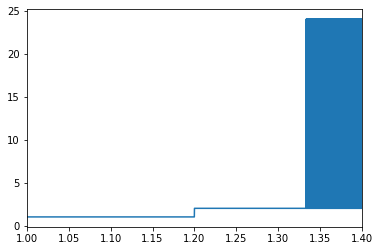

In [38]:
from matplotlib import pyplot as plt
x_init = [1, 1, 1] # Here we all choose [1,1,1] as the initial value.
omegas = np.linspace(1, 1.4, 10000)
i = []
for omega in omegas:
    count = 0
    i.append(SOR(A, b, omega = omega, N =25, x = [0, 0, 0])[0])
    count += 1
plt.plot(omegas, i)
plt.xlim(1,1.4)
plt.show()

<font size = 3 color = black face = "Times New Roman">Then, let's use the formula below to calculate the theoretical prediction of the optimal relaxation parameter $\omega$
$$
\omega_\text{opt} = 1+\left(\frac{\lambda_J}{1+\sqrt{1-\lambda_J^2}}\right)^2 
$$
$\lambda_J$ is the spectral radius calculated  in the Jacobi method.  
Therefore, we should find $\lambda_J$ first, and here we introduce the power method.

In [39]:
def power(A, x0, epsilon = 1e-10):
    i = 0
    x1 = x0
    a0 = 0
    a1 = 1
    while abs(a1 - a0) > epsilon:
        x0 = x1
        x1 = np.dot(A, x0)
        a0 = a1
        a1 = np.dot(x0, x1)/np.dot(x0,x0)
        x1 = normalise(x1)
        i = i + 1
    return x1 ,i, a1
x = normalise(np.array([1, 1, 1]))
power(A, x, epsilon = 1e-10)

(array([ 0.57735047, -0.57734987,  0.57735047]), 17, 4.999999999995573)

<font size = 3 color = black face = "Times New Roman"> Now we have $\lambda_J \approx 0.57746778$

In [40]:
lamda_j = 5
omega_op =1 + (lamda_j / (1 + (1 - lamda_j  ** 2)**0.5))**2
omega_op

(0.07999999999999985-0.3919183588453087j)

<font size = 3 color = black face = "Times New Roman"> Finally, we have $\omega_\text{opt} \approx 1.101000671653077$

### Problem 4

<font size = 3 color = black face = "Times New Roman"> Once again, we're going to solve the Problem $Ax = b$, but using the conjugate gradient method. In this problem $A$ is shown below and $b$ is generated by the normal distributed random numbers. 
$$
A = \begin{pmatrix}
2 &-1  &  & &\\
-1 & 2 &-1  & \\
& -1 & 2 &-1  \\
& & -1  &2 &-1 \\
& & & -1 & 2
\end{pmatrix}
$$

<font size = 3 color = black face = "Times New Roman"> First of all, let's input $A$ and generate $b$. Sinc  $A$ is already a positive symmetric matrix, we don't need to addtional operations.

In [46]:
def matrix_A(N):
    A = np.zeros((N,N))
    for i in range(N):
        for j in range(N):
            if i==j:
                A[i][j] = 2
            elif i == j - 1 or i == j + 1:
                A[i][j] = -1
    return A
A = matrix_A(5) # Create the matrix A
b = np.random.normal(size = (5)) # Create b with the normal distributed random numbers.
print(b)

[-0.30341246 -0.69553223 -0.4950266   1.17852    -0.4862037 ]


<font size = 3 color = black face = "Times New Roman"> Then we define a function to solve problems with conjugate gradient method.

In [47]:
def conjugate_grad(A, b, x=None):
    n = len(b)
    if not x:
        x = np.ones(n)
    r = b - np.dot(A, x)
    p = r
    r_k_norm = np.dot(r, r)
    for i in range(2*n):
        Ap = np.dot(A, p)
        alpha = r_k_norm / np.dot(p, Ap)
        x += alpha * p
        r -= alpha * Ap
        r_kplus1_norm = np.dot(r, r)
        beta = r_kplus1_norm / r_k_norm
        r_k_norm = r_kplus1_norm
        if r_kplus1_norm < 1e-5:
            print('Iteration:{}'.format(i)) # Output the times of iteration.
            break
        p = r + beta * p
    return x

In [48]:
print("Matrix b:{}\n".format(b))
print("Solution x_conjugate_grad:{}".format(conjugate_grad(A, b, x=None))) # Conjugate gradient method.

Matrix b:[-0.30341246 -0.69553223 -0.4950266   1.17852    -0.4862037 ]

Solution x_conjugate_grad:[-0.63813608 -0.98597784 -0.62990371  0.20252076 -0.14458379]


<font size = 3 color = black face = "Times New Roman"> From the results above, we can find the solution x for a random b. Then we use Jacobi's method and Cholesky method to solve the equation with same b again, and compare their results with this one.

In [50]:
x_init = np.zeros_like(b.T)
jacobi(A, b.T, x_init) # Jacobi's method from Problem1.

(array([-0.65223913, -1.00106579, -0.65436022,  0.18737196, -0.14941587]), 154)

In [45]:
import scipy.linalg # Cholesky method
L = np.linalg.cholesky(A)
y = scipy.linalg.solve(L, b)
x = scipy.linalg.solve(L.T, y)
print("Solution x_Cholesky:{}".format(x)) 

Solution x_Cholesky:[ 0.90223738  0.88793042  0.01199548 -0.96287503 -0.98595737]


<font size = 3 color = black face = "Times New Roman"> From the results above, we can find although the solutions from the three methods are very close to each other, they still have some differences.

### Problem 5

In [18]:
def normalise(x,eps=1e-10):
    N = np.sqrt(np.sum(abs(x)**2))
    if N < eps: # in case it is the zero vector!
        return x
    else:
        return x/N
    

def power(A, x0, epsilon = 1e-10):
    i = 0
    x1 = x0
    a0 = 0
    a1 = 1
    while abs(a1 - a0) > epsilon:
        x0 = x1
        x1 = np.dot(A, x0)
        a0 = a1
        a1 = np.dot(x0, x1)/np.dot(x0,x0)
        x1 = normalise(x1)
        i = i + 1
    return x1 ,i, a1

<font size = 3 color = black face = "Times New Roman">(a)

In [19]:
A = np.array([[4, -1j, 2],
            [1j, 2, 2+7j],
            [2, 2-7j, -2]])
x = normalise(np.array([1, 1, 1]))
x, iteration, a = power(A, x)
print("Dominant eigenvector:",x)
print("Dominant eigenvalue: {:.5f}".format(a))
print("iteration count:{}".format(iteration))

Dominant eigenvector: [0.33980972-0.23445694j 0.49134277+0.51067228j 0.50105938-0.27621534j]
Dominant eigenvalue: 8.45188+0.00000j
iteration count:273


<font size = 3 color = black face = "Times New Roman">(b)

In [21]:
x0 = normalise(np.array([1, 1, 1]))
x1 = np.dot(A,x0)
i = 0
while np.linalg.norm(x1 - x0) > 1e-10 and i < 500:
    x0 = x1
    x1 = normalise(np.dot(A, x0))
    i = i + 1
i

230

<font size = 3 color = black face = "Times New Roman">Obvious this method can decrease run time.

### Problem 6

<font size = 3 color = black face = "Times New Roman"> Firstly, enter the matrix we're going to deal with.

In [152]:
A = np.array([[4, -1j, 2], [1j, 2, 2 + 7j], [2, 2 - 7j, -2]])
eps = 1e-8 # Set the accuracy.

<font size = 3 color = black face = "Times New Roman"> Then define a function to find the minimum eigenvalue.

In [155]:
import numpy as np
def rayleigh_quotient(A,x): # Calculate the rayleigh quotient.
    return np.dot(x, np.dot(A, x))/np.dot(x,x)

def minimum_eigen_finder(A, eps, N = 25, x = None): # Define a function to find the minimum eigenvalue.
    if not x:
        x = normalise(np.array([1, 1, 1]))
    else:
        x = normalise(np.array(x)) # Step1: Choose a normalised vector x0   
    for i in range(N):    
        x_new = np.linalg.solve(A,x) # Step2: Get the next x
        x_new = normalise(x_new)
        if np.linalg.norm(x_new - x, ord=2) < eps: # Judge whether x is convergent.
            break
        x = x_new
    mini_eigen = rayleigh_quotient(A,x) # Get the minimum eigenvalue from the rayleigh quotient.
    return mini_eigen

In [157]:
mini_eigen = minimum_eigen_finder(A, eps = eps, N = 25, x = None)
mini_eigen

(3.1896027772323547-2.9426682307850324e-09j)

<font size = 3 color = black face = "Times New Roman"> Finally, we get the minimum eigenvalue $\lambda_{mini} = 3.1896027772323547-2.9426682307850324 \times 10^{-9}i$.